### Annalisa Paladino, Nicola Zucchia, Luca Pernice

# PROGETTO SISTEMI DINAMICI 
##  Esercizio 3 : *Mappa Logistica*



Librerie necessarie


In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [15, 10]

### Punto 1 : scrivere un programma per iterare le mappe


Per prima cosa definisco la funzione *deriv()* .
In questo primo esempio iteriamo la mappa logistica con parametro λ = 3.5696.
In seguito verrà riproposta la funzione *deriv()* dove però sarà neccessario inserire il parametro come input. 


In [5]:
#---------Deriv------------#
def deriv(t):
    return 3.5696*t*(1-t)
#--------------------------#

Il numero di iterazioni è salvato nella variabile *tlim*


In [6]:
tlim =25
t = np.linspace(0,tlim,tlim+1)

Condizione iniziale:

In [7]:
x = np.zeros(len(t))
x[0]=0.4

Nell'array *x* vengono salvate le iterazioni con un ciclo for.

In [8]:
for i in range(1,len(t)):
    x[i]=deriv(x[i-1])

Questo è il risultato 

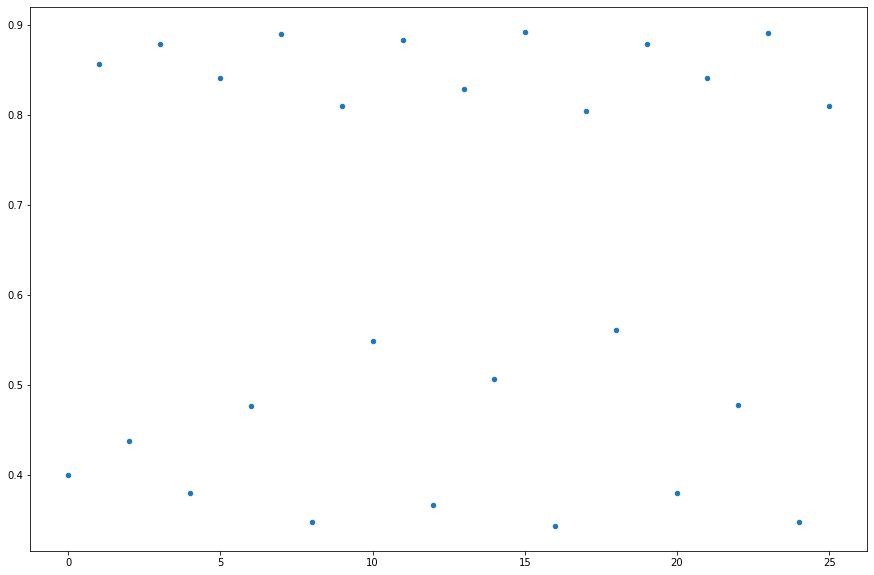

In [9]:
plt.scatter(t,x,marker = 'o',s = 20)

### Punto 2 : Diagramma di biforcazione

Modifico la funzione *deriv()*:

In [10]:
#---------Deriv------------#
def deriv(t,r):
    return r * t * (1-t)
#--------------------------#


Il valore 4$\lambda$ corrisponde alla variabile *r* .

Fisso *tlim* e *R*, ovvero i valori del parametro

In [11]:
tlim = 1000
t = np.linspace(0,tlim,tlim+1)

R = np.linspace(3,4,10000)

Condizione iniziale:

In [12]:
x = np.zeros(len(t))
x[0]=0.5

Nel codice N corrisponde a *len(t) - i*. 
Plottiamo le iterazioni maggiori di un certo indice *i*.

In [13]:
ascissa = []
ordinata = []
for j in range(len(R)):
    for i in range(1,len(t)):
        x[i]=deriv(x[i-1],R[j])
        if i > 900: 
            ascissa.append(R[j])
            ordinata.append(x[i])

Si può vedere il comportamento della mappa in funzione di *r* nel grafico sottostante.

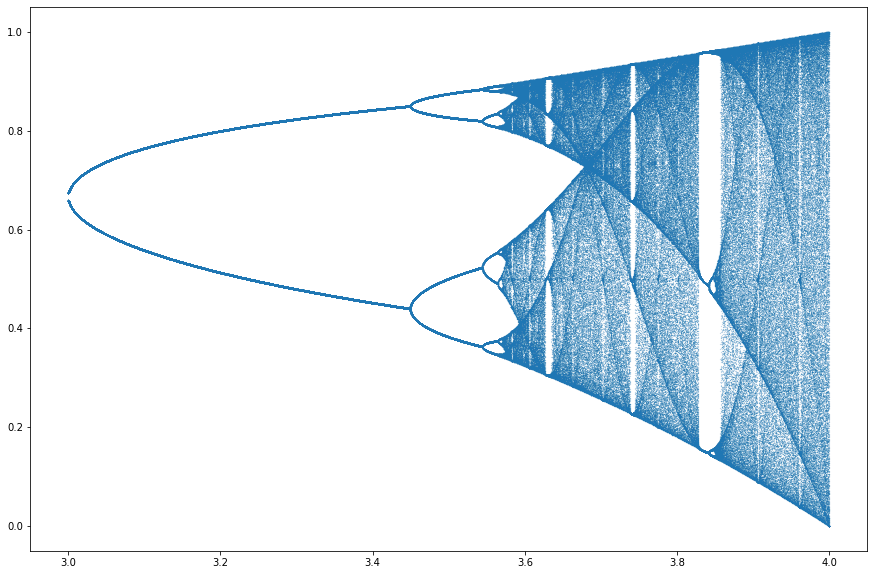

In [14]:
plt.scatter(ascissa,ordinata,s = 0.01)

Con meno interazioni chiaramente si ottiene un grafico meno definito con linee più spesse.

In [15]:
tlim = 20
t = np.linspace(0,tlim,tlim+1)

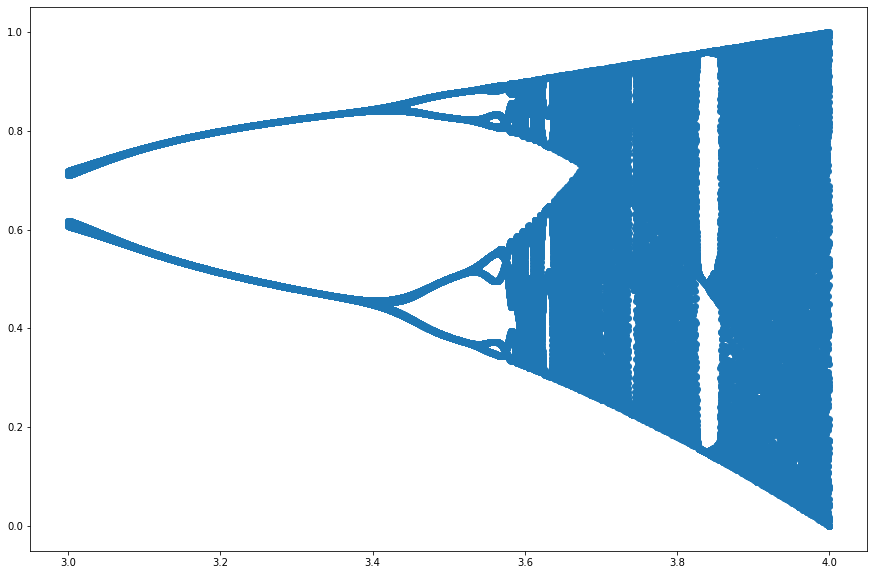

In [16]:
z = np.zeros(len(t))
z[0]=0.5
ascissa = []
ordinata = []
for j in range(len(R)):
    for i in range(1,len(t)):
        z[i]=deriv(z[i-1],R[j])
        if i > 10: 
            ascissa.append(R[j])
            ordinata.append(z[i])

plt.scatter(ascissa,ordinata)

Lo stesso si può fare con l'altra mappa:

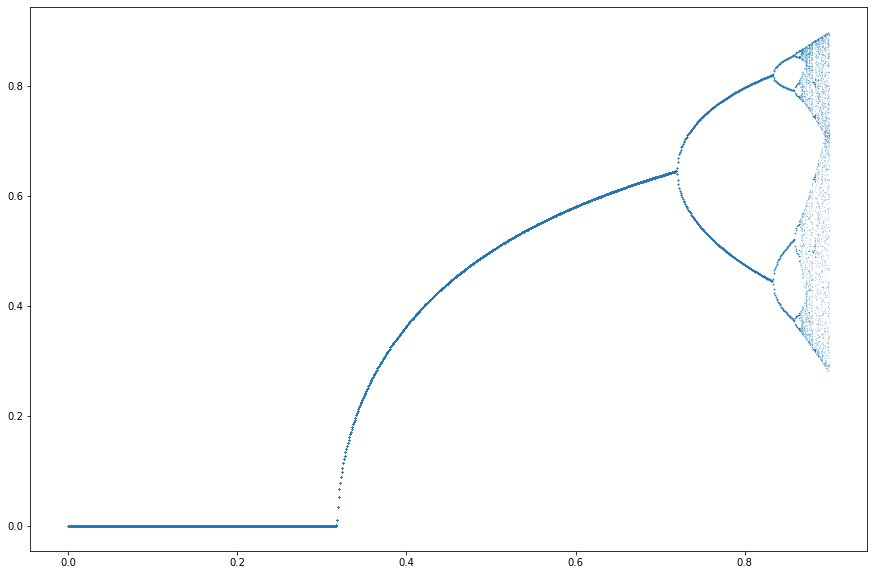

In [18]:
R = np.linspace(0,0.9,1000)

#---------Deriv------------#
def deriv(t,r):
    return r *  np.sin(np.pi * t)
#--------------------------#

tlim = 1000
t = np.linspace(0,tlim,tlim+1)


x = np.zeros(len(t))
x[0]=0.5
ascissa = []
ordinata = []
for j in range(len(R)):
    for i in range(1,len(t)):
        x[i]=deriv(x[i-1],R[j])
        if i > 900:
            ascissa.append(R[j])
            ordinata.append(x[i])
            

            
plt.scatter(ascissa,ordinata,s = 0.01)

### Punto 3: Periodicità

Per prima cosa bisogna fissare un errore:

In [19]:
errore = 0.0000001

Cambiando il valore dell'errore fino a 0.01 non si osservano errori significativi nel calcolo del periodo e le imprecisioni osservate
si possono attribuire alla precisione di macchina, un errore di 0.1 sul periodo o maggiore causa imprecisioni significative sul periodo osservato

Definisco una funzione ausiliaria *periodicità()*:
ritorna True solo se i valori nell'*array* sono di periodo uguale a *period*.

In [20]:
def periodicità(array,period):
    boolean = True
    i = 0
    while boolean and i < len(array) - period :
        if array[i] <= array[i + period] + errore and array[i] >=array[i + period] - errore :
            i = i+1
        else:
            boolean = False
    
    return boolean



Codice della funzione richiesta dall'esercizio, la quale torna il periodo se l'array dato in input è periodico.

In [21]:
def len_periodo(array)   :     
    for j in range(1,int(len(array)/2)):
        
        if periodicità(array,j) == True:
            periodo = j
            
            result = True
            break
        else:
            result = False
    
    

    if result == True:
        return periodo
    else:
        return False

Per come è stata sviluppata la funzione *len_periodo()* troveremo periodi fino metà della lunghezza dell'array di input (il primo ciclo *for* itera tra 1 e *int(len(array)/2)*).
Se infatti il periodo fosse maggiore non sarei in grado di verificarlo perchè non tutti i numeri presenti nell'array si ripeterebbero.

### Punto 4: Numero di Feigenbaum

Stimare con precisione le posizioni delle *"period doubling bifurcations"* è computazinalmente costoso.
Conviene far variare il parametro su un intervallo il più corto possibile. 

In [22]:
#---------Deriv------------#
def deriv(t,r):
    return t*r*(1-t)
#--------------------------#

In [23]:
R = np.linspace(3,3.6,10000)
tlim = 10000
t = np.linspace(0,tlim,tlim+1)

In [24]:
x = np.zeros(len(t))
x[0]=0.5

risultati = [3]
periodi = [2]
for j in range(len(R)):
    ordinata = []
    for i in range(1,len(t)):
        x[i]=deriv(x[i-1],R[j])
        if i > 9870:    #con questo valore di i posso trovare periodi fino a 64
            
            ordinata.append(x[i])
    
    per = len_periodo(ordinata)
    if per == periodi[-1]*2 :
        periodi.append(per)
        risultati.append(R[j])

Quando viene calcolato il periodo, plottiamo le iterazioni maggiori di un certo indice *i*: se i valori plottati sono un numero x, allora per come è stata sviluppata la funzione
*len_periodo()* troveremo periodi fino a x/2, in particolare la potenza di 2 maggiore più piccola di x/2.
In questo caso, troveremo periodi fino a 64.

In [25]:
r_p = list(zip(risultati,periodi))

Stampa dei valori ottenuti:

In [26]:
for k in range(1,len(r_p)+1):
    print(f'{k}^ biforcazione : {r_p[k-1]}')

1^ biforcazione : (3, 2)
2^ biforcazione : (3.4490249024902493, 4)
3^ biforcazione : (3.543954395439544, 8)
4^ biforcazione : (3.5643564356435644, 16)
5^ biforcazione : (3.568736873687369, 32)
6^ biforcazione : (3.56969696969697, 64)


Stima del numero di Feigenbaum

In [27]:

R = (3.568736873687369 - 3.5643564356435644) / (3.56969696969697 - 3.568736873687369)
print(R)

4.562500000001069


Analogamente per l'altra mappa:

In [28]:
R = np.linspace(0.7,0.9,1000)

#---------Deriv------------#
def deriv(t,r):
    return r*np.sin(np.pi*t)
#--------------------------#

tlim = 10000
t = np.linspace(0,tlim,tlim+1)


x = np.zeros(len(t))
x[0]=0.5

risultati = [0]
periodi = [1]
for j in range(len(R)):
    ordinata = []
    for i in range(1,len(t)):
        x[i]=deriv(x[i-1],R[j])
        if i > 9870:
            
            ordinata.append(x[i])
            
    #print(len_periodo(ordinata))
    per = len_periodo(ordinata)
    if per == periodi[-1]*2 :
        periodi.append(per)
        risultati.append(R[j])
    

r_p = list(zip(risultati,periodi))
for k in range(1,len(r_p)):
    print(f'{k}^ biforcazione : {r_p[k]}')

1^ biforcazione : (0.7198198198198198, 2)
2^ biforcazione : (0.8333333333333334, 4)
3^ biforcazione : (0.8585585585585586, 8)
4^ biforcazione : (0.8641641641641642, 16)
5^ biforcazione : (0.8653653653653653, 32)


In [29]:
R2 = (0.8641641641641642 - 0.8585585585585586) / (0.8653653653653653 - 0.8641641641641642)
R2

4.666666666666882

Un'approssimazione ancora più precisa rispetto all'altra mappa!